In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import ticker


In [3]:
data = pd.read_csv('../../Data/Curated/UseCaseDataCurated.csv')

/tmp/ipykernel_1353552/1909286072.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../Data/Curated/UseCaseDataCurated.csv')


In [4]:
data.columns

Index(['Data Source', 'Data Type', 'Data Document ID', 'Data Document Title',
       'Document Date', 'DTXSID', 'Curated Chemical Name', 'CAS',
       'Provisional DTXSID', 'Harmonized Functional Use',
       ...
       'Bit_2039', 'Bit_2040', 'Bit_2041', 'Bit_2042', 'Bit_2043', 'Bit_2044',
       'Bit_2045', 'Bit_2046', 'Bit_2047', 'SMILES'],
      dtype='object', length=2059)

/tmp/ipykernel_714123/2139341420.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered,


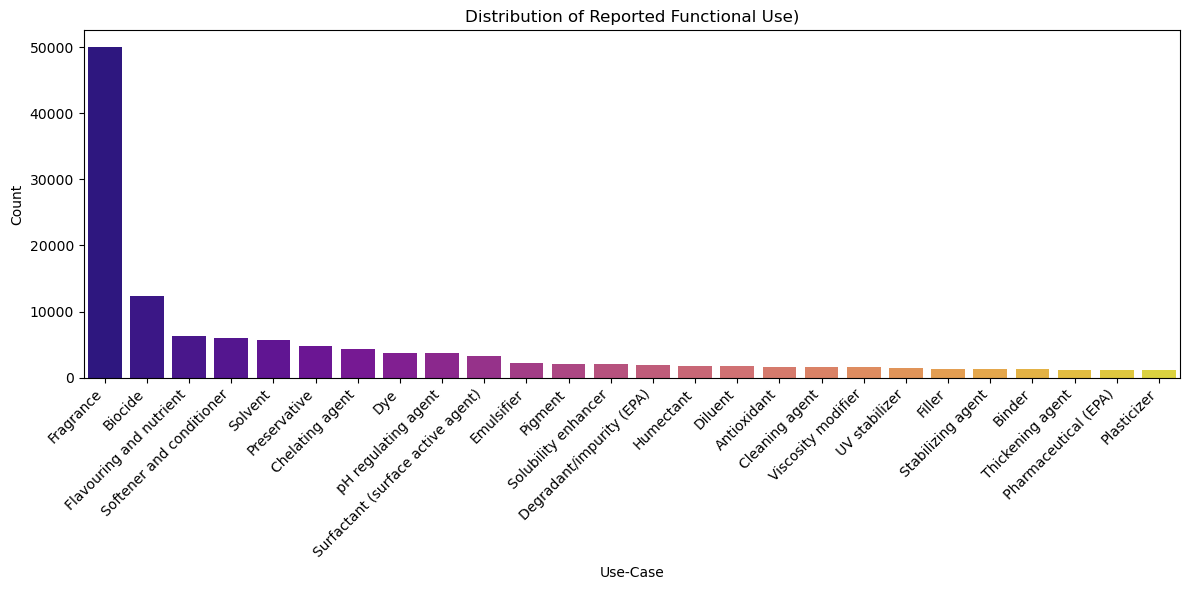

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts and filter for counts > 200
value_counts = data['Harmonized Functional Use'].value_counts()
filtered_categories = value_counts[value_counts > 1000].index.tolist()

# Create a filtered dataframe
df_filtered = data[data['Harmonized Functional Use'].isin(filtered_categories)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, 
              x='Harmonized Functional Use',
              order=filtered_categories, palette='plasma')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Use-Case')
plt.ylabel('Count')
plt.title('Distribution of Reported Functional Use)')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# for pub

/tmp/ipykernel_1353552/3238037758.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered,


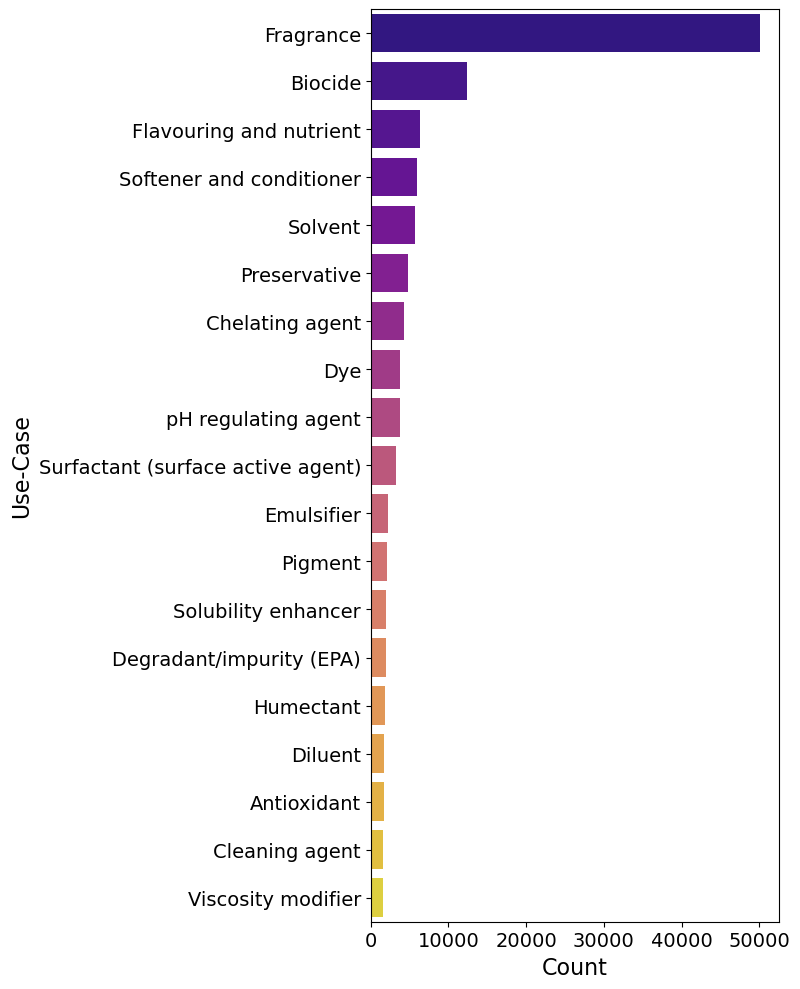

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts and filter for counts > 200
value_counts = data['Harmonized Functional Use'].value_counts()
filtered_categories = value_counts[value_counts > 1500].index.tolist()

# Create a filtered dataframe
df_filtered = data[data['Harmonized Functional Use'].isin(filtered_categories)]

# Create the plot
plt.figure(figsize=(8, 10))  # Adjusted figure size to better fit horizontal bars
sns.countplot(data=df_filtered, 
              y='Harmonized Functional Use',  # Changed from x to y
              order=filtered_categories, 
              palette='plasma')

# Remove rotation since y-axis labels are horizontal by default
plt.xticks(rotation=0)



plt.ylabel('Use-Case', fontsize=16)  # Y-axis label font size
plt.xlabel('Count', fontsize=16)     # X-axis label font size


# Adjust tick label sizes
plt.xticks(fontsize=14)  # X-axis tick labels
plt.yticks(fontsize=14)  # Y-axis tick labels

# Adjust layout to prevent label cutoff






# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


Use Case Index Reference:
    Index                 Use Case
0       0                  Solvent
1       1                Fragrance
2       2                 Abrasive
3       3      pH regulating agent
4       4                  Pigment
..    ...                      ...
56     56             Deflocculant
57     57                Humectant
58     58                   Tracer
59     59    Leavening agent (EPA)
60     60  Food preservative (EPA)

[61 rows x 2 columns]


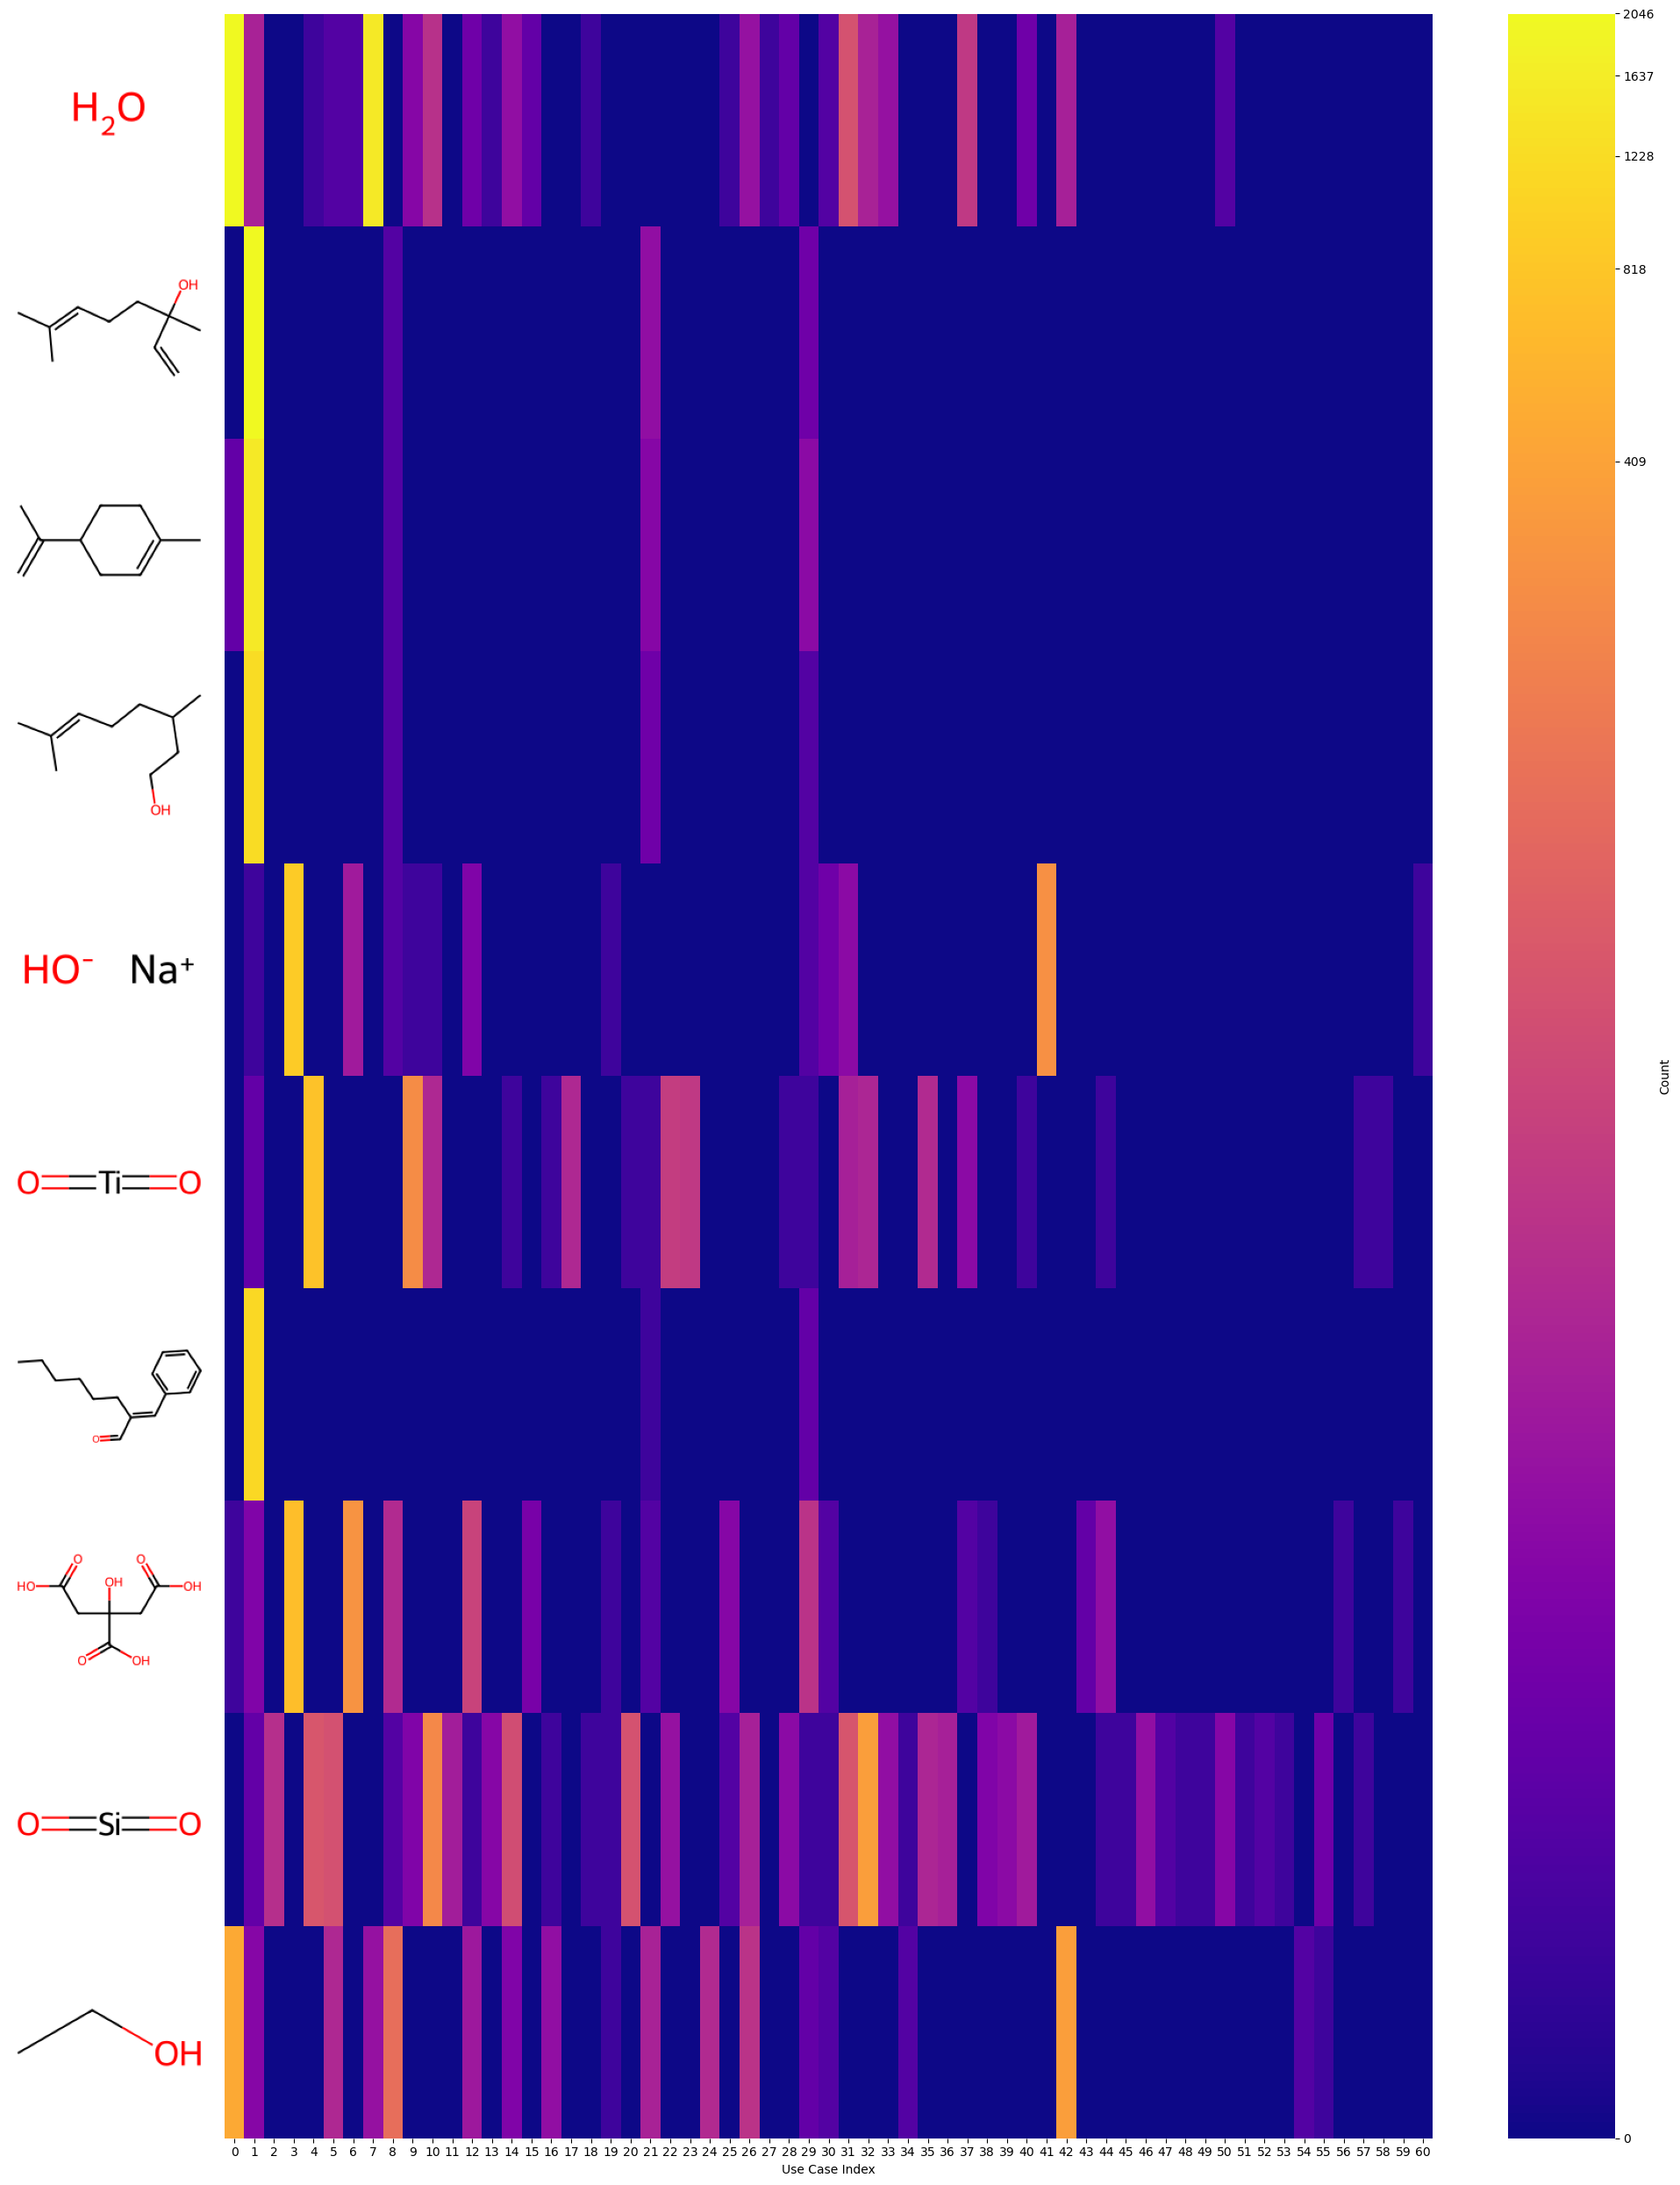

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Get the top 25 most common molecules
top_molecules = data['SMILES'].value_counts().nlargest(10).index

# Filter the dataframe to only include top molecules
df_filtered = data[data['SMILES'].isin(top_molecules)]

# Create numerical indices for use cases
usecase_to_idx = {case: idx for idx, case in enumerate(df_filtered['Harmonized Functional Use'].unique())}

# Create matrix of occurrences
matrix = pd.DataFrame(0, 
                     index=range(len(top_molecules)),
                     columns=range(len(usecase_to_idx)))

# Fill the matrix with counts
for _, row in df_filtered.iterrows():
    mol_idx = list(top_molecules).index(row['SMILES'])
    case_idx = usecase_to_idx[row['Harmonized Functional Use']]
    matrix.iloc[mol_idx, case_idx] += 1

# Create molecule images
mol_images = []
for smiles in top_molecules:
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(200, 200))
    mol_images.append(img)

# Create figure with custom gridspec
fig = plt.figure(figsize=(20, 25))
gs = plt.GridSpec(len(top_molecules), 16)

# Create main heatmap axis
ax_heatmap = plt.subplot(gs[:, 2:])

# Plot molecule images
for idx, img in enumerate(mol_images):
    ax_mol = plt.subplot(gs[idx, 0:2])
    ax_mol.imshow(img)
    ax_mol.axis('off')

matrix_log = np.log1p(matrix)
max_value = matrix.max().max()

sns.heatmap(matrix_log, 
            cmap='plasma',
            cbar_kws={
                'label': 'Count',
                'ticks': np.log1p(np.linspace(0, max_value, 6)),
                'format': ticker.FuncFormatter(lambda x, p: f'{np.expm1(x):.0f}')
            },
            xticklabels=True,
            yticklabels=False,
            ax=ax_heatmap)
# Customize the plot
ax_heatmap.set_xlabel('Use Case Index')


# Create lookup DataFrame for use cases
usecase_lookup = pd.DataFrame({
    'Index': usecase_to_idx.values(),
    'Use Case': usecase_to_idx.keys()
}).sort_values('Index')

# Print use case reference
print("\nUse Case Index Reference:")
print(usecase_lookup)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# for pub


Use Case Index Reference:
    Index                 Use Case
0       0                  Solvent
1       1                Fragrance
2       2                 Abrasive
3       3      pH regulating agent
4       4                  Pigment
..    ...                      ...
56     56             Deflocculant
57     57                Humectant
58     58                   Tracer
59     59    Leavening agent (EPA)
60     60  Food preservative (EPA)

[61 rows x 2 columns]


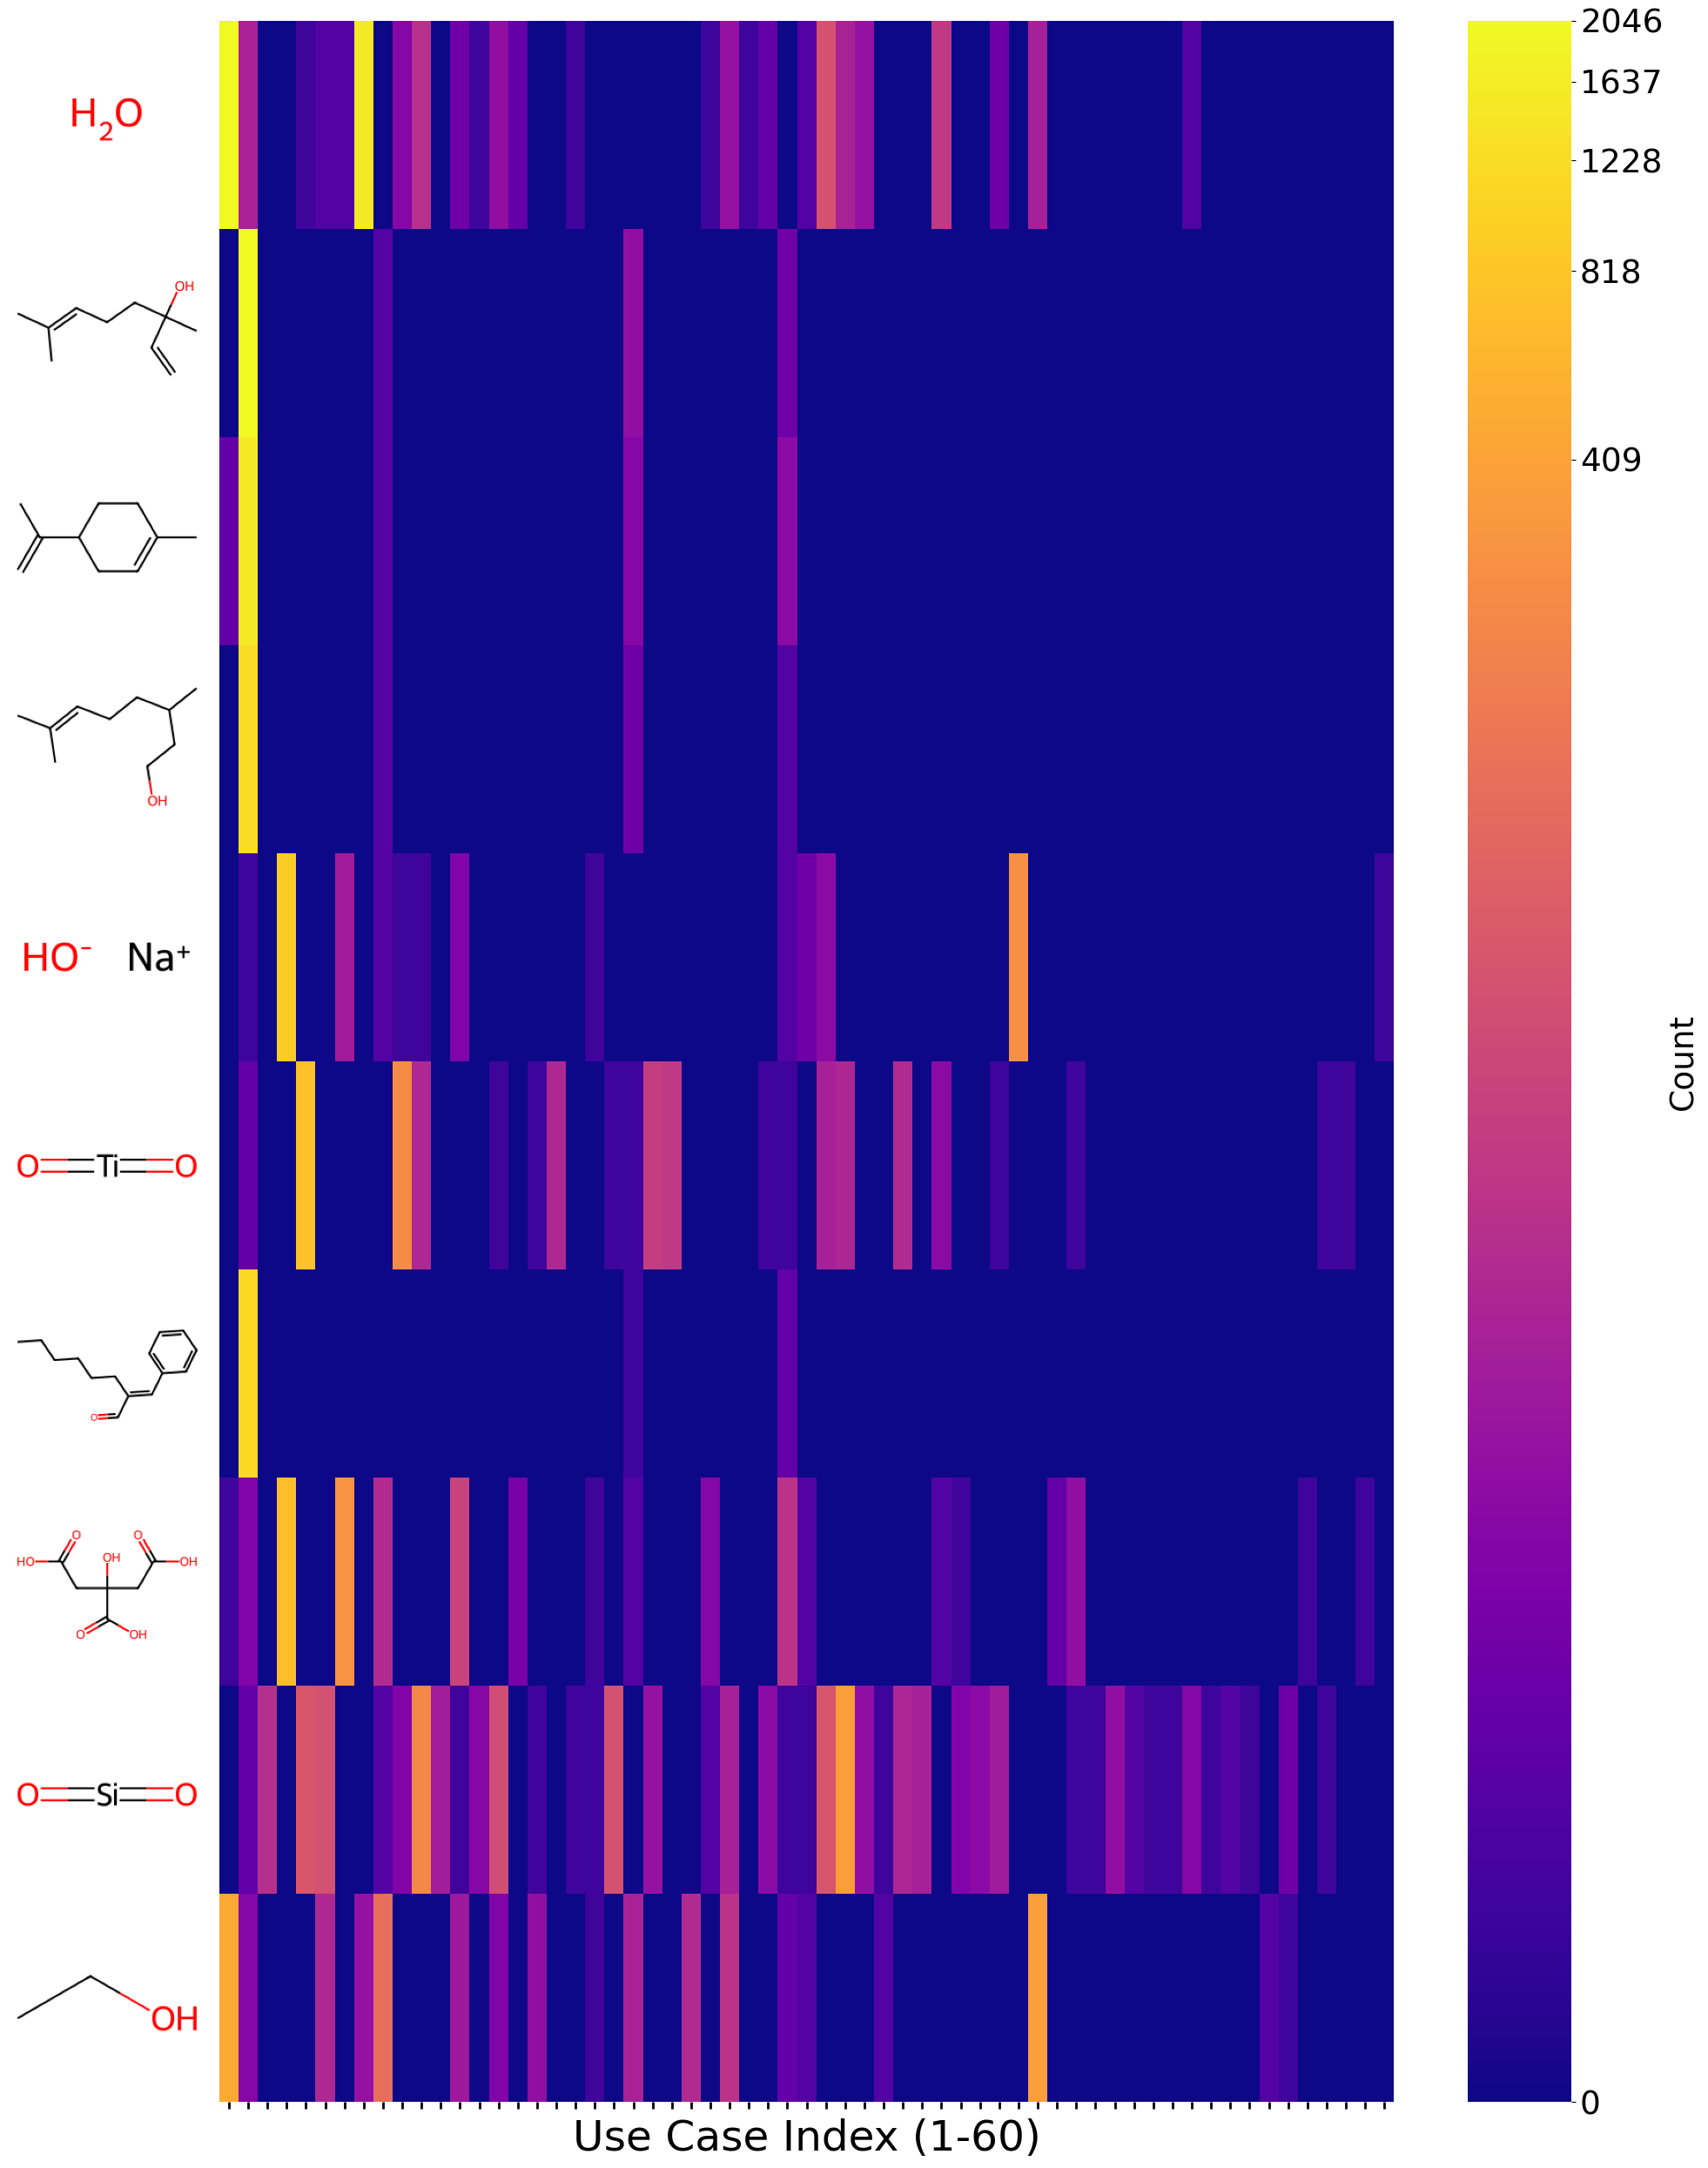

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from matplotlib import ticker

# Get the top 25 most common molecules
top_molecules = data['SMILES'].value_counts().nlargest(10).index

# Filter the dataframe to only include top molecules
df_filtered = data[data['SMILES'].isin(top_molecules)]

# Create numerical indices for use cases
usecase_to_idx = {case: idx for idx, case in enumerate(df_filtered['Harmonized Functional Use'].unique())}

# Create matrix of occurrences
matrix = pd.DataFrame(0, 
                     index=range(len(top_molecules)),
                     columns=range(len(usecase_to_idx)))

# Fill the matrix with counts
for _, row in df_filtered.iterrows():
    mol_idx = list(top_molecules).index(row['SMILES'])
    case_idx = usecase_to_idx[row['Harmonized Functional Use']]
    matrix.iloc[mol_idx, case_idx] += 1

# Create molecule images
mol_images = []
for smiles in top_molecules:
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(200, 200))
    mol_images.append(img)

# Create figure with custom gridspec
fig = plt.figure(figsize=(20, 25))
gs = plt.GridSpec(len(top_molecules), 16)

# Create main heatmap axis
ax_heatmap = plt.subplot(gs[:, 2:])

# Plot molecule images
for idx, img in enumerate(mol_images):
    ax_mol = plt.subplot(gs[idx, 0:2])
    ax_mol.imshow(img)
    ax_mol.axis('off')

matrix_log = np.log1p(matrix)
max_value = matrix.max().max()

# Plot heatmap with larger ticks
heatmap = sns.heatmap(matrix_log, 
                      cmap='plasma',
                      cbar_kws={
                          'label': 'Count',
                          'ticks': np.log1p(np.linspace(0, max_value, 6)),
                          'format': ticker.FuncFormatter(lambda x, p: f'{np.expm1(x):.0f}')
                      },
                      xticklabels=True,
                      yticklabels=False,
                      ax=ax_heatmap)

# Remove tick labels but keep the ticks
ax_heatmap.set_xticklabels([])  # This removes just the labels
ax_heatmap.tick_params(axis='both', which='major', length=6, width=2)  # Keep tick marks
ax_heatmap.tick_params(axis='both', which='minor', length=4, width=1.5)


# Add x-axis label
ax_heatmap.set_xlabel('Use Case Index (1-60)', fontsize=35)  # Add this line

# Adjust colorbar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=27)
cbar.set_label('Count', fontsize=27)

# Adjust colorbar font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=27)
cbar.set_label('Count', fontsize=27)

# Create lookup DataFrame for use cases
usecase_lookup = pd.DataFrame({
    'Index': usecase_to_idx.values(),
    'Use Case': usecase_to_idx.keys()
}).sort_values('Index')

# Print use case reference
print("\nUse Case Index Reference:")
print(usecase_lookup)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
df1 = pd.read_csv('/home/matt/Proj/QSURv3/Results/Visualization/NNAnalysis/predictions_corrected.csv')

In [7]:
df1.columns

Index(['SMILES', 'Predicted_Class_Index', 'Predicted_Use', 'Confidence'], dtype='object')

In [8]:
df2 = pd.read_csv('/home/matt/Proj/QSURv3/CPCProcessing/molecular_data_with_functions.csv')

In [10]:
df2.columns

Index(['SMILES', 'Patent', 'CPC_Code', 'CPC_4char', 'Functional_Use'], dtype='object')